### Численные методы ЛР9 (Минимизация функций), задачи 9.1, 9.2. 

### Якименко Александра (32 в списке группы). Выполняемые задачи, согласно приложению 2А: 9.1.2. В таблице к задаче 9.2 десять вариантов, значит мой - 9.2.2.

# Задача 9.1 (вариант 2) 
Методом Ньютона найти минимум и максимум унимодальной на отрезке $[a, b]$ функции $f(x)$ с точностью $\varepsilon = 10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.


$f(x) = e^x\sin x$

$[a, b] = [0, 4]$

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Зададим функцию и ее производную, концы отрезка и точность

In [2]:
def f(x):
    return np.exp(x)*np.sin(x)

def dfdx(x):
    return np.exp(x)*(np.sin(x) + np.cos(x))

def dfdx2(x):
    return 2*np.exp(x)*np.cos(x)

def y0(x):
    return x*0

a, b = 0, 4

epsilon = 1e-6

### Построим график исходной функции

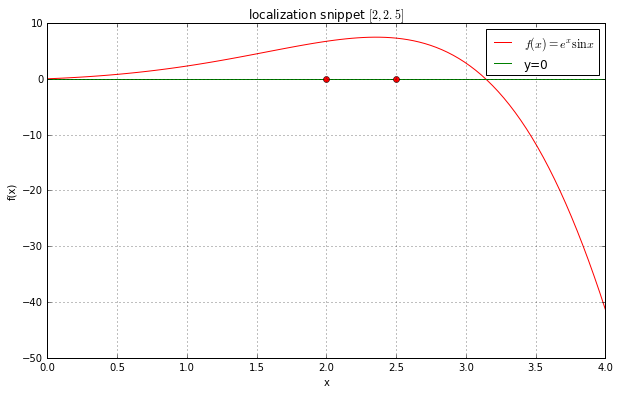

In [17]:
x = np.linspace(0, 4, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x), 'r', label=r"$f(x) = e^x \sin x$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([2, 2.5], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.set_title(r"localization snippet $[2, 2.5]$")
ax.legend();
plt.show()

### Из графика функции очевидно, что минимум достигается на правом конце отрезка, т.е. в точке x=4

In [16]:
print("x min =", b, "\nf(x min) =", f(b))

x min = 4 
f(x min) = -41.3200161843


### Построим график производной

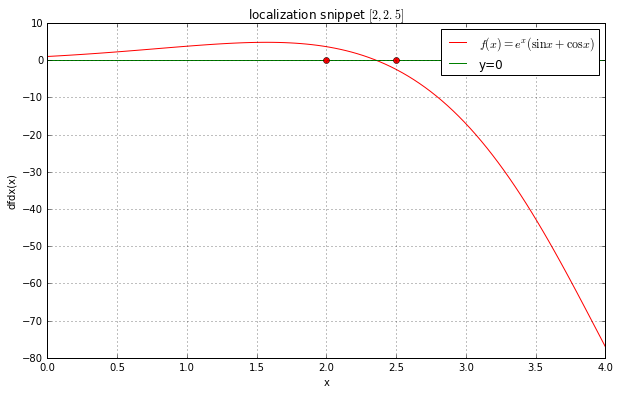

In [10]:
x = np.linspace(0, 4, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, dfdx(x), 'r', label=r"$f(x) = e^x(\sin x + \cos x)$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([2, 2.5], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('dfdx(x)')
ax.grid()
ax.set_title(r"localization snippet $[2, 2.5]$")
ax.legend();
plt.show()

### Адаптированный для производной метод Ньютона

$ f(x) = e^x \sin x$

$\frac{df}{dx}=e^x(\sin x + \cos x)$

$\frac{d^2f}{dx^2}= 2 e^x \cos x$

$x^{n+1}=x^n - \frac{f'(x^n)}{f''(x^n)}$

критерий остановки $|x^n-x^{n-1}|<\varepsilon$

In [20]:
def newton(dfdx, dfdx2, x0, e):
    k = 1
    x_prev = x0
    x_curr = x_prev - dfdx(x_prev)/dfdx2(x_prev)
    while abs(x_curr-x_prev) > e:
        x_prev = x_curr
        x_curr = x_prev - dfdx(x_prev)/dfdx2(x_prev)
        k+=1
    return (x_curr, k)

In [22]:
newton_root = newton(dfdx, dfdx2, (2+2.5)/2, epsilon)
print("корень f'(x)=0, максимум функции методом Ньютона:", newton_root[0], "\nколичество итераций:", newton_root[1])

корень f'(x)=0, максимум функции методом Ньютона: 2.35619449019 
количество итераций: 4


# Задача 9.2 (вариант 2) 
Указанным в индивидуальном варианте методом найти минимумы и максимумы функции $f(x)$ на отрезке $[x_1, x_2]$ с точностью $\varepsilon = 10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

Использовать метод бисекции

$f(x) = (t+1)\cos t$

$[a, b] = [0, 4]$

In [3]:
def f(t):
    return (t+1)*np.cos(t)

def dfdx(t):
    return np.cos(t) - np.sin(t)*(t+1)

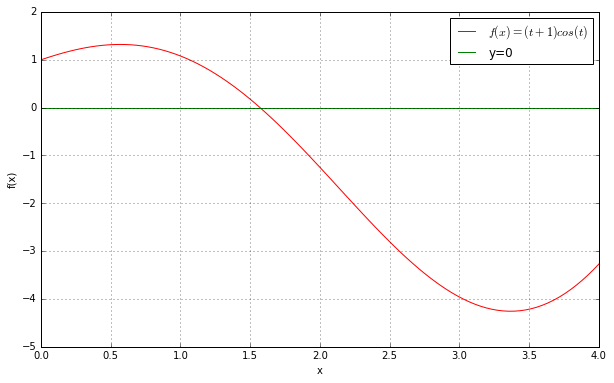

In [26]:
x = np.linspace(0, 4, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, f(x), 'r', label=r"$f(x) = (t+1)cos(t)$")
ax.plot(x, y0(x), 'green', label=r"y=0")
#ax.plot([2, 2.5], [0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
#ax.set_title(r"localization snippet $[2, 2.5]$")
ax.legend();
plt.show()

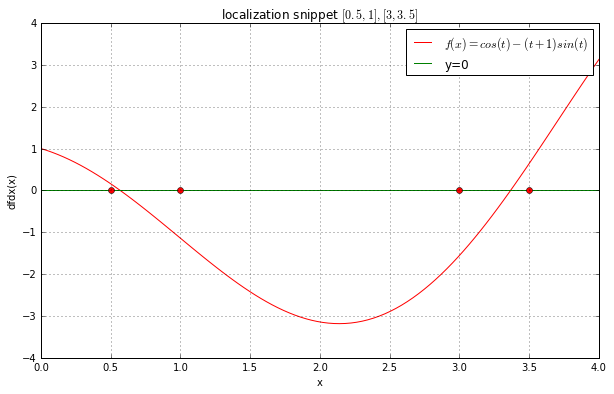

In [30]:
x = np.linspace(0, 4, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, dfdx(x), 'r', label=r"$f(x) = cos(t) - (t+1)sin(t)$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([0.5, 1, 3, 3.5], [0, 0, 0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('dfdx(x)')
ax.grid()
ax.set_title(r"localization snippet $[0.5, 1], [3, 3.5]$")
ax.legend();
plt.show()

In [8]:
def bisec_max(f, a, b, e, delta):
    an, bn = a, b
    k = 0
    while (bn - an)>e:
        xn = (an+bn)/2
        alpha = (an+bn)/2 + delta
        beta = (an+bn)/2 - delta
        fa = f(alpha)
        fb = f(beta)
        if fa <= fb:
            bn = beta
            xn = alpha
        else:
            an = alpha
            xn = beta
        k += 1  
    return (xn, k)

def bisec_min(f, a, b, e, delta):
    an, bn = a, b
    k = 0
    while (bn - an)>e:
        xn = (an+bn)/2
        alpha = (an+bn)/2 + delta
        beta = (an+bn)/2 - delta
        fa = f(alpha)
        fb = f(beta)
        if fa >= fb:
            bn = beta
            xn = alpha
        else:
            an = alpha
            xn = beta
        k += 1  
    return (xn, k)

In [9]:
root1 = bisec_max(f, 0.5, 1, epsilon, 0.000001)
print("первый корень:", root1[0], "\nколичество итераций:", root1[1])

первый корень: 0.5677797194900512 
количество итераций: 18


In [10]:
root2 = bisec_min(f, 3, 3.5, epsilon, 0.000001)
print("второй корень:", root2[0], "\nколичество итераций:", root2[1])

второй корень: 3.3667178517532346 
количество итераций: 18


In [11]:
print("максимум:", f(root1[0]), "минимум:", f(root2[0]))

максимум: 1.32179043078 минимум: -4.25652882239
